In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import where as IF

In [2]:
 ## Q no 1--  Import claims_data.csv and cust_data.csv which is provided to you and 
## combine the two datasets appropriately to create a 360-degree view of 
## the data. Use the same for the subsequent questions.


In [3]:
claims = pd.read_csv("C:/Users/SONY/Desktop/p case study/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv")
cust_demo = pd.read_csv("C:/Users/SONY/Desktop/p case study/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")

In [4]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [5]:
cust_demo.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [6]:
combined = pd.merge(left = cust_demo, right = claims, left_on = "CUST_ID", right_on = "customer_id", how ="outer")

In [7]:
combined.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [8]:
combined.drop(columns = ["customer_id"], inplace = True)

In [9]:
combined.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [10]:
## Q no 2--  Perform a data audit for the datatypes and find out if there are any 
## mismatch within the current datatypes of the columns and their 
## business significance.

In [11]:
combined["DateOfBirth"] = pd.to_datetime(combined.DateOfBirth, format = "%d-%b-%y")

In [12]:
combined["claim_date"] = pd.to_datetime(combined.claim_date, format = "%m/%d/%Y")
combined["Contact"] = pd.to_numeric(combined.Contact.str.replace("-",""), downcast = "float")



In [13]:
 ## Q no--3 Convert the column claim_amount to numeric. Use the appropriate 
## modules/attributes to remove the $ sign.

In [14]:
combined["claim_amount"] = pd.to_numeric(combined.claim_amount.str.replace("$",""), downcast = "float")

C:\Users\SONY\AppData\Local\Temp\ipykernel_1016\2388883277.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined["claim_amount"] = pd.to_numeric(combined.claim_amount.str.replace("$",""), downcast = "float")


In [15]:
combined.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [16]:
## Q no --4 Of all the injury claims, some of them have gone unreported with the 
## police. Create an alert flag (1,0) for all such claims.

In [17]:
combined["flag"] = IF(combined.police_report == "No", 0 ,
                    IF(combined.police_report == "Yes", 1, np.nan))

In [18]:
combined.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0


In [19]:
## Q no-- 5  One customer can claim for insurance more than once and in each claim,
## multiple categories of claims can be involved. However, customer ID 
## should remain unique. 
## Retain the most recent observation and delete any duplicated records in
## the data based on the customer ID column.

In [20]:
combined = combined.groupby('CUST_ID').first().reset_index(drop = True)

In [21]:
combined.head(10)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,0.0
5,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,Crime,2018-07-14,Auto,No,Material only,2630.0,1.0,No,0.0
6,Male,1977-08-03,AK,6.133853e+09,Gold,7238381.0,Other driver error,2018-07-14,Auto,No,Material only,2920.0,2.0,No,0.0
7,Female,1997-12-07,AL,4.877234e+09,Gold,87184588.0,Other causes,2017-10-10,Auto,No,Material and injury,21190.0,1.0,No,0.0
8,Male,2062-02-17,HI,3.215345e+09,Platinum,86240106.0,Driver error,2017-07-01,Auto,No,Material only,2490.0,2.0,No,0.0
9,Female,2060-07-29,OR,7.367260e+09,Silver,50906515.0,Crime,2018-08-23,Auto,No,Material only,2507.0,5.0,Yes,0.0


In [22]:
## Q no--6 Check for missing values and impute the missing values with an 
## appropriate value. (mean for continuous and mode for categorical)

In [23]:
combined.head(3)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,NaN


In [24]:
category_col = ["gender","State","Segment","incident_cause","claim_area","police_report","claim_type","fraudulent","flag"]
conti_col = ["claim_amount"]

In [25]:
for x in category_col:
    combined[x] = combined[x].fillna(combined[x].mode()[0])

In [26]:
combined[conti_col] = combined[conti_col].fillna(combined[conti_col].mean())

In [27]:
combined.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0


In [28]:
 ##Q no 7. Calculate the age of customers in years. 

In [29]:
combined["Age"] = round((combined.claim_date - combined.DateOfBirth).apply(lambda x: x.days)/365.25, 2)

In [30]:
combined.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0,39.88
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.29
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.22
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.59
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.96


In [31]:
combined["Age_grp"] = IF(combined.Age < 18, "Children",
                        IF(combined.Age < 30, "Youth",
                         IF(combined.Age < 60, "Adult",
                          IF(combined.Age < 100, "Senior", "NaN"))))
                         
                        
                
combined["Age_grp"] = combined["Age_grp"].fillna(combined["Age_grp"].mode())
combined.groupby(by = "Age_grp").count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
Age_grp,,,,,,,,,,,,,,,,
Adult,499,499,499,499,499,499,499,499,499,499,499,499,494,499,499,499
Children,253,253,253,253,253,253,253,253,253,253,253,253,250,253,253,253
NaN,7,7,7,7,7,0,7,0,7,7,7,7,0,7,7,0
Youth,326,326,326,326,326,326,326,326,326,326,326,326,324,326,326,326


In [32]:
## Q no 8-- What is the average amount claimed by the customers from various segments?


In [33]:
combined.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12755.710938
Platinum,12370.138672
Silver,12271.163086


In [34]:
## Q no 9 -- What is the total claim amount based on incident cause for all the claims
## that have been done at least 20 days prior to 1st of October, 2018.

In [35]:
combined.loc[combined.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum()

incident_cause
Crime                  724462.5
Driver error          3264286.0
Natural causes        1312706.0
Other causes          3725038.5
Other driver error    3318806.5
Name: claim_amount, dtype: float32

In [36]:
## Q no--10 How many adults from TX, DE and AK claimed insurance for driver 
# related issues and causes? 

In [37]:
combined.loc[(combined.incident_cause.str.lower().str.contains("driver") 
             & ((combined.State == "TX") | (combined.State == "DE") | (combined.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

In [38]:
## Q no-- 11 Draw a pie chart between the aggregated value of claim amount based 
# on gender and segment. Represent the claim amount as a percentage on
# the pie chart.

In [39]:
Agg_amt = combined.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
Agg_amt.head()

,gender,Segment,claim_amount
0,Female,Gold,2122234.0
1,Female,Platinum,2381974.0
2,Female,Silver,1935970.0
3,Male,Gold,2622890.5
4,Male,Platinum,2120756.5


In [40]:
summ = Agg_amt.pivot(index = "Segment", columns = "gender", values = "claim_amount")
summ

gender,Female,Male
Segment,,
Gold,2122234.0,2622890.5
Platinum,2381974.0,2120756.5
Silver,1935970.0,2346666.0


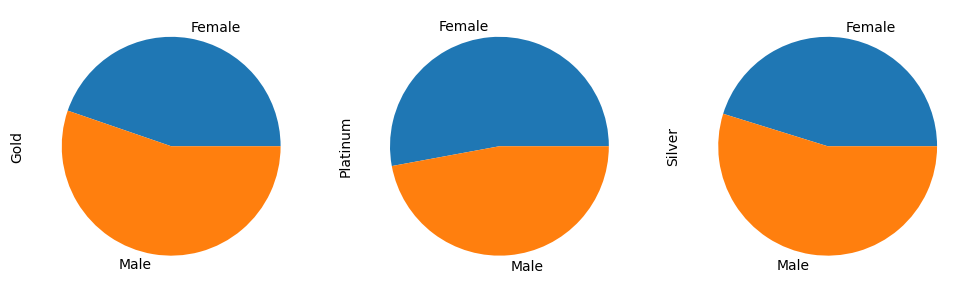

In [41]:
summ.T.plot(kind = "pie", subplots = True, legend = False, figsize = (12,8))
plt.show()

In [42]:
## Q no 12-- Among males and females, which gender had claimed the most for any 
# type of driver related issues? E.g. This metric can be compared using a 
# bar chart


In [43]:
combined.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.29,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.22,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.59,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.96,Adult


In [44]:
Gender_wise_claim= combined.loc[(combined.incident_cause.str.lower().str.contains("driver"))].groupby(["gender"])[["gender"]].count().add_prefix("countOf_").reset_index()
Gender_wise_claim

,gender,countOf_gender
0,Female,221
1,Male,280


[]

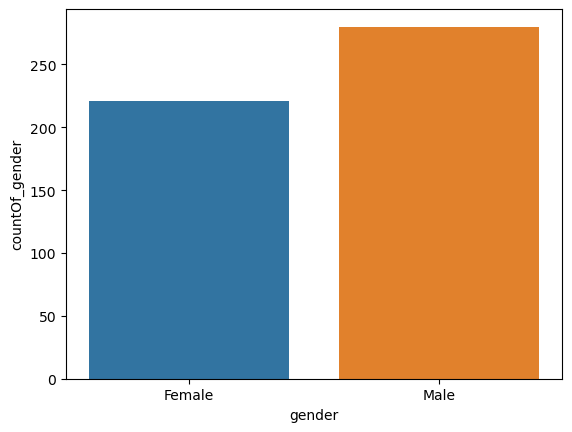

In [45]:
sns.barplot(x= "gender", y= "countOf_gender", data= Gender_wise_claim)
plt.plot()

In [46]:
## Q 13-- Which age group had the maximum fraudulent policy claims? Visualize 
# it on a bar chart.

In [47]:
combined["Frauds"]= np.where(combined.fraudulent == "Yes",1,0)

In [48]:
combined.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp,Frauds
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult,1
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.29,Adult,1


In [49]:
max_agegroup_fraud= combined.groupby(["Age_grp"])["Frauds"].sum().reset_index()
max_agegroup_fraud

,Age_grp,Frauds
0,Adult,113
1,Children,61
2,NaN,0
3,Youth,73


[]

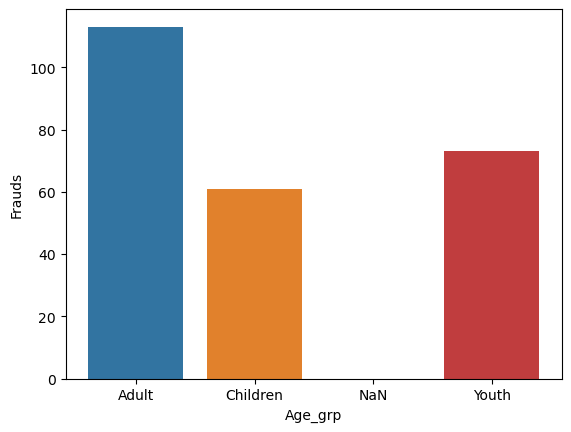

In [50]:
sns.barplot(x= "Age_grp", y="Frauds", data=max_agegroup_fraud )
plt.plot()

In [51]:
## Q no 14-- Visualize the monthly trend of the total amount that has been claimed 
# by the customers. Ensure that on the “month” axis, the month is in a 
# chronological order not alphabetical order. 

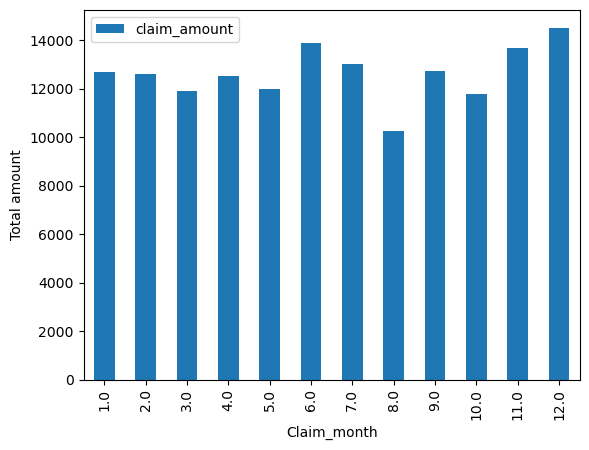

In [52]:
combined['claim_month'] = pd.to_datetime(combined['claim_date'])
combined['Claim_month'] = combined['claim_month'].dt.month
pd.pivot_table(combined,index="Claim_month",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount')
plt.show()

In [53]:
## Q no 15-- What is the average claim amount for gender and age categories and 
## suitably represent the above using a facetted bar chart, one facet that 
## represents fraudulent claims and the other for non-fraudulent claims.


In [54]:
Frauds_amt_gender= pd.DataFrame(combined.loc[(combined.fraudulent=="Yes")].groupby(["gender","Age_grp"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amt_gender=pd.DataFrame(combined.loc[(combined.fraudulent=="No")].groupby(["gender","Age_grp"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [55]:
Claims_age_gender=round(pd.merge(Frauds_amt_gender,Non_Frauds_amt_gender, on=["gender","Age_grp"]),2)

In [56]:
Claims_age_gender.head(5)

Fraud_claim_amount  Non_Fraud_claim_amount
gender Age_grp                                             
Female Adult           16294.110352            12586.059570
       Children         6440.330078            12280.269531
       Youth            7599.120117            12300.639648
Male   Adult           17121.830078            12325.730469
       Children        17519.359375            11929.620117

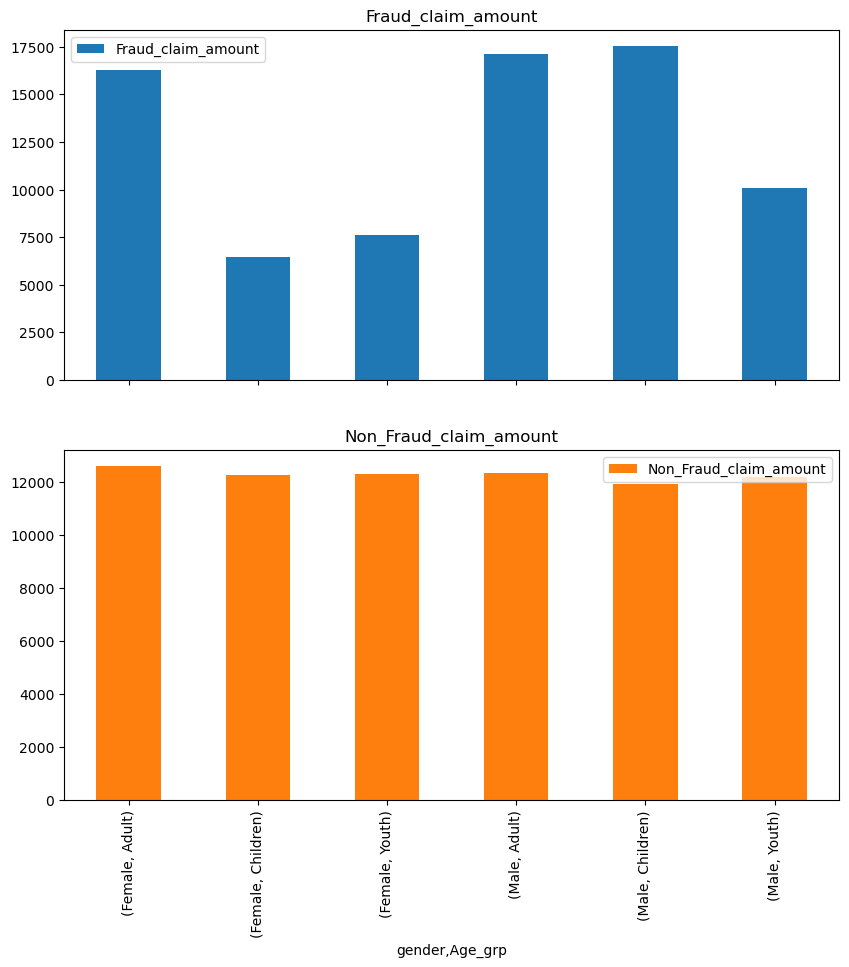

In [57]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

In [58]:
## Q no 16-- Is there any similarity in the amount claimed by males and females?

In [59]:
male_claim = combined['claim_amount'].loc[combined['gender']=="Male"]
female_claim = combined['claim_amount'].loc[combined['gender']=="Female"]

In [60]:
print("The average amount claimed by males is ", male_claim.mean())

print("The average amount claimed by females is ", female_claim.mean())

The average amount claimed by males is  12821.54296875
The average amount claimed by females is  12105.59765625


In [61]:
import scipy.stats as stats

In [62]:
#checking the variance
# equal variance

eq_var = stats.ttest_ind(a= male_claim,
                b= female_claim,
                equal_var=True)    
eq_var.statistic

0.8848206621724444

In [63]:
# UnEqual variance
uneq_var = stats.ttest_ind(a= male_claim,
                b= female_claim,
                equal_var=False)    
uneq_var.statistic

0.8854215458922358

In [64]:
t= eq_var.statistic
p= eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

 For the above test, the t-score is 0.8848206621724444 and the p-value is 0.37644976200164215
We fail to reject null hypothesis


In [65]:
## As the value of t test is greater than 0.05 we can safely conclude that there 
## is a similarity in amount claimed by males and females.

In [66]:
## Q no 17-- Is there any relationship between age category and segment?

In [67]:
## we will use Chi Square test
##  H0= No relation between category and segment;
# Ha= There is a relationship between category and segment

In [68]:
age_cat_seg = pd.crosstab(combined.Age_grp, combined.Segment, margins = True)
age_cat_seg

Segment,Gold,Platinum,Silver,All
Age_grp,,,,
Adult,181,158,160,499
Children,85,87,81,253
NaN,1,3,3,7
Youth,105,116,105,326
All,372,364,349,1085


In [69]:
Chi_test = stats.chi2_contingency(observed= age_cat_seg)
Chi_test

(3.2533723084717066,
 0.9934754200859646,
 12,
 array([[ 171.08571429,  167.40645161,  160.5078341 ,  499.        ],
        [  86.74285714,   84.87741935,   81.3797235 ,  253.        ],
        [   2.4       ,    2.3483871 ,    2.2516129 ,    7.        ],
        [ 111.77142857,  109.36774194,  104.86082949,  326.        ],
        [ 372.        ,  364.        ,  349.        , 1085.        ]]))

In [70]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 3.2533723084717066 and the p value is 0.9934754200859646


In [71]:
# Since the value of the test is greater than 0.05, we fail reject the null hypothesis. 
# Therefore there is no relationship between age category and segment.

In [72]:
## Q no 18-- The current year has shown a significant rise in claim amounts as 
## compared to 2016-17 fiscal average which was $10,000.

In [73]:
# we will check the pearson coeffecient.

# The H0=  No relationship between the 2016-17 claim amounts and current claim amounts,
# Ha= Retionship exists;
# the CI= 95%, p=0.05

In [82]:
claim_amt = combined.claim_amount
claim_amt

0       12470.501953
1       39192.000000
2        1621.500000
3       37040.000000
4       35250.000000
            ...     
1080    21480.000000
1081    14360.000000
1082     1242.000000
1083     2415.000000
1084     2310.000000
Name: claim_amount, Length: 1085, dtype: float32

In [83]:
print("Mean of claim_amt = ", claim_amt.mean())

Mean of claim_amt =  12470.51953125


In [84]:
stats.ttest_1samp(combined.claim_amount,10000)

Ttest_1sampResult(statistic=6.108224077525169, pvalue=1.4021795323937641e-09)

In [77]:
##Q no 19-- Is there any difference between age groups and insurance claims?

In [78]:
age_group_1 = combined['total_policy_claims'].loc[combined['Age_grp']=="Youth"]
age_group_2 = combined['total_policy_claims'].loc[combined['Age_grp']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is nan and the p value is nan
We fail to reject null hypothesis


In [79]:
## Q no 20-- Is there any relationship between total number of policy claims and the 
## claimed amount?

combined['total_policy_claims'] = pd.to_numeric(combined['total_policy_claims'])


In [93]:
combined.total_policy_claims.corr(other= combined.claim_amount)

-0.014369036618012743

In [ ]:
# Since the correlation is negative the number of policy claims in inversely propotional to the claimed amount.
